# Homework 9: Bayesian Models and Neural Networks

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis

## Problem 1: Bayesian Models

Paleobotanists estimate the moment in the past when a 
given species became extinct by taking cylindrical, vertical core 
samples below the earth's surface, and looking for the last
occurrence of the species in the fossil record. This is measured in meters
above the point $P$ at which the species was known to have first
emerged.  

Letting $\{y_i, i = 1, \ldots, n\}$ denote a sample of
such distances above $P$ at a random set of locations, the model can be represented as

\begin{equation*}
(y_i | \theta) \sim \mbox{Unif}(0,\theta)
\end{equation*}

In this model the unknown $\theta > 0$ can be used to estimate
the species extinction time through carbon dating.  *This problem is about Bayesian inference for $\theta$.* ***Please explain the mathematical steps for each part of the problem. Points will be deducted if you do not show and explain your work!***

**a.** Show that the likelihood may be written as

\begin{equation*}
p(\{y_1,\ldots, y_n\}|\theta) = 
\theta^{-n} I(\theta \geq \max(y_1, \ldots, y_n)),
\end{equation*}

where $I$ is the **indicator function**, i.e. $I(A) = 1 $ if $A$ is true and 0 otherwise.

**`[double click here to add a solution to part a]`**

**b.** The Pareto distribution (written $\theta \sim \mbox{Pareto}(\alpha,\beta)$
has density/PDF:

\begin{equation*}
p(\theta) = \left\{
\begin{array}{cc}
\alpha \beta^\alpha \theta^{-(\alpha + 1)} & \mbox{if}\ \theta \geq \beta \\
0 & \mbox{otherwise}
\end{array},
\right .
\end{equation*}
where the normalizers $\alpha, \beta > 0$.

With the likelihood viewed as a constant multiple of a
density for $\theta$, show that the likelihood corresponds to
the $\mbox{Pareto}(n-1,m)$ distribution, *where you will need to determine m.*

Now, let the prior
for $\theta$ be taken to be $\mbox{Pareto}(\alpha,\beta)$
and derive the posterior distribution $p(\theta | y)$.

Is the Pareto conjugate to the uniform? As discussed in class, a likelihood and prior are conjugate pairs if the posterior distribution is in the same class (in this case, a Pareto distribution) as the prior.

**`[double click here to add a solution to part b]`**

**c.** In an experiment conducted in the Antarctic in the
1980's to study a particular species of fossil ammonite,
the following was a linearly rescaled version of the data
obtained, in ascending order: 

$y = (0.4, 1.0, 1.5, 1.7, 2.0, 2.1, 3.1, 3.7, 4.3, 4.9)$.  

Prior information equivalent to a Pareto prior with $(\alpha,\beta) = (2.5,4)$ was available. Plot the prior, likelihood, and posterior distributions arising from this data set on the same graph, and briefly discuss what this picture implies about the updating of information from prior to posterior in this case.

**`[double click here to add a solution to part c]`**

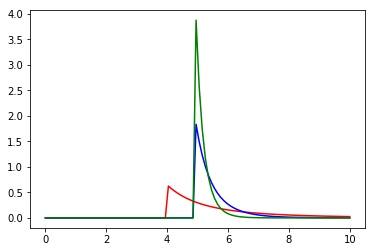

In [43]:
# If you choose to program the plot, please do so within Jupyter here.
# Make sure to explain the plot, as indicated in the question!
import matplotlib.pyplot as plt
from scipy.stats import pareto

y = [0.4, 1.0, 1.5, 1.7, 2.0, 2.1, 3.1, 3.7, 4.3, 4.9]
alpha = 2.5
beta = 4
x = np.linspace(0, 10, 100)



y_prior = pareto.pdf(x, scale = beta, b = alpha)

y_likelihood = pareto.pdf(x, scale = max(y), b = (len(y)-1))

y_posterior = pareto.pdf(x, scale = max(beta,max(y)), b = (len(y)+alpha) )

y_prior = [0]*100
for i in range(100):
    j = i/10
    if(j>=beta):
        y_prior[i]= alpha*(beta**alpha)*((1/j)**(alpha+1))
        
alpha = (len(y)-1)
beta = max(y)

y_likelihood = [0]*100
for i in range(100):
    j = i/10
    if(j>=beta):
        y_likelihood[i]= alpha*(beta**alpha)*((1/j)**(alpha+1))
        
alpha = (len(y)+alpha)
beta = max(beta,max(y))

y_posterior = [0]*100
for i in range(100):
    j = i/10
    if(j>=beta):
        y_posterior[i]= alpha*(beta**alpha)*((1/j)**(alpha+1))

plt.plot(x, y_prior, 'r') # plotting t, a separately 
plt.plot(x, y_likelihood, 'b') # plotting t, b separately 
plt.plot(x, y_posterior, 'g') # plotting t, c separately 

plt.show()

#The updated beliefs for theta calculated after updating from prior to posterior, shows us that a theta at 4.9 gives 
#the best possible likelihood distribution, as opposed to a theta of 4, as can be seen with the peaks of posterior, and 
#prior respectively. It can also be observed that the peak for the likelihood function is at 4.9, hence supporting the
#results from the posterior suggesting a theta of 4.9 yields the best likelihood distribution. It can also be seen by the 
#graph that the posterior is very much determined by the likelihood, implying that the prior is uninformative. 



## Problem 2: Limitations of the Perceptron

We aim to train a perceptron to model the logic functions **OR**$(x_1,x_2)$ and **XNOR**$(x_1, x_2)$, using the set of four 2D points, $x \in \{(0,0)^T, (1,0)^T, (0,1)^T, (1,1)^T\}$.

In order to model **OR**$(x_1,x_2)$, the perceptron classifier must output $1$ for $x \in \{(1,0)^T,(0,1)^T, (1,1)^T\}$ and output $0$ if $x = (0,0)^T$. The perceptron classifier (activation threshold of the perceptron) is represented by $f(x) =\mathbf 1[ w^Tx + b > 0]$.

Instead of using a bias vector $b$, we can augment the data by $1$ and use a linear classifier: $f(x) =\mathbf 1[ w^T x > 0 ]$. To do this, we replace $x$ with $x$ $\in \{(1,1,0)^T,(1,0,1)^T, (1,1,1)^T, (1,0,0)\}$ and $w$ with a vector in $\mathbb{R^3}$.

**a.** Using the initial weight vector $w_0 = (0,0,0)^T$ and the [perceptron algorithm](https://www.cs.cmu.edu/~avrim/ML10/lect0125.pdf), derive the $w$ that models the **OR**$(x_1,x_2)$ function. **You can do this either manually (i.e. writing out the weight updates) or by programming the algorithm in Jupyter.** Before you begin, you should normalize your data.

**`[double click here to add a solution to part a, if handwritten]`**

In [5]:
# If you choose to program your algorithm, do so here. 
# Do not use sklearn except where we used it :).
# We have started you off. Fill in places where we've written "YOUR CODE HERE".
from sklearn.preprocessing import normalize
import numpy as np

# Step 1. Initialize weight vector & define data.
x = np.array([[1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 0]]) # given data
y = np.array([1, 1, 1, 0]) # correct predictions
w = np.array([0, 0, 0])

# Normalize each sample to have norm 1.
x = normalize(x, norm='l2')

# Step 2. Activation threshold (prediction).
def predict(sample, weights):
    ## YOUR CODE HERE: Return the prediction (1 or 0) based on the activation threshold
    
    pred = np.dot(weights.T, sample)
    if(pred>0):
        prediction = 1
        return prediction
    else:
        prediction = 0
        return prediction
        
    #return None
    ##

# Step 3. Updating weights.
def update(w, x, y, epochs):
    for j in range(epochs):
        i = 0
        for sample in x:
            # Make prediction using the above function
            prediction = predict(sample, w)
            
            ## YOUR CODE HERE: Update weights according to the link above (pg. 2)
            # Hint: how do we usually update weights? Use the true label somewhere...
            if(prediction ==1 and y[i] == 0):
                w = w - sample
            elif(prediction == 0 and y[i]==1):
                w = w+sample
            else:
                w = w
            ##
            
            i += 1
            # This will help us see how often we make mistakes
            print("Weight vector on epoch ", j, " sample ", i, "is ", w)
    return w

# Now, run the perceptron! Remember, you are done when the weight vector stabilizes.
epochs = 4 # "stop criteria" - arbitrary, feel free to change as you see fit.
w_new = update(w, x, y, epochs)
print("The final weight vector to model OR(x1,x2) with this data is: ", w_new)

Weight vector on epoch  0  sample  1 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  2 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  3 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  4 is  [-0.29289322  0.70710678  0.        ]
Weight vector on epoch  1  sample  1 is  [-0.29289322  0.70710678  0.        ]
Weight vector on epoch  1  sample  2 is  [0.41421356 0.70710678 0.70710678]
Weight vector on epoch  1  sample  3 is  [0.41421356 0.70710678 0.70710678]
Weight vector on epoch  1  sample  4 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  1 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  2 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  3 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  4 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  3  sample  1 is  [-0.58578644  0.70710678  

**b.** We just showed that a perceptron can model **OR**$(x_1, x_2)$ successfully. Prove that a perceptron can't model **XNOR**$(x_1, x_2)$. *Hint: think about linearity.*

**`[double click here to add a solution to part b]`**

## Problem 3: Neural Networks and the XNOR Problem

So, the perceptron can't model the **XNOR**$(x_1, x_2)$ function. We now want to design a neural network (by hand) to solve the **XNOR** problem. 

**a.** Write the **XNOR** function in terms of the logical functions **OR**$(x_1,x_2)$, **AND**$(x_1,x_2)$, **NOR**$(x_1,x_2)$. 

**`[double click here to add a solution to part a]`**

**b.** We will now design a network to model this function, using the hyperbolic tangent ([$tanh$](http://reference.wolfram.com/language/ref/Tanh.html)) as the activation function in all of the nodes. The network will take two binary variables as input, and output 1 only when the inputs are both 0 or both 1.

The $tanh$ function outputs [-1,+1], not our desired output of [0,1]. Thus, we have appropriately changed the OR node to take +1/-1 as inputs. Also, we have added an extra last layer to convert the final output from +1/-1 to 0/1.

*Hint: assume that $tanh$ outputs -1 for any input $x\leq -2$, +1 for any input $x\geq 2$, and 0 for $x=0$.*

<img src="xnor1.png" style="height:130px;"><img src="xnor2.png" style="height:110px;">

What are the missing weights $a,b,c,d,e,f$ of the **OR**, **NAND**, **AND** and **CONVERT** subnetworks, respectively?

**`[double click here to add a solution to part b]`**